In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Read csv file...
r = pd.read_csv('AG_NO3_fill_cells_remove_NAN.csv').dropna()
#...create label column...
r['label'] = 0
#...change 'Student_Flag' to int to compare to label...
r['Student_Flag'] = r['Student_Flag'].astype(int)
#...set window size and quotient...
window = 100
q = 98.0

In [3]:
#...label the first window of data points...
threshold = np.percentile(r['NO3N'][0:window],q)
#threshold = np.mean(r['NO3N'][0:window])
for i in range(window):
    if r['NO3N'][i] > threshold:
        r.loc[i,'label'] = 1

In [4]:
for i in range(window, len(r)):
    #...update threshold from [0,999] to [1,1000], or one step forward until the end...
    threshold = np.percentile(r['NO3N'][i-(window-1):i],q)
    #...label data point...
    if r['NO3N'][i] >= threshold:
        r.loc[i,'label'] = 1

In [6]:
anomalies = [x for x in r['label'] if x == 1]
print('Anomalies Detected: ' + str(len(anomalies)))
#anomalies = [x,y for x,y in  if x == 1]

normal_events = [x for x in r['Student_Flag'] if x == 0]
print('Number of Normal Events: ' + str(len(normal_events)))

student_flags = [x for x in r['Student_Flag'] if x == 1]
print('Number of student Flags: ' + str(len(student_flags)))
TP = np.zeros(len(r))
FP = np.zeros(len(r))
for i, row in r.iterrows():
    if row['label'] == 1:
        if row['Student_Flag'] == 1: 
            TP[i] = row['NO3N']
        else:
            FP[i] = row['NO3N']
            
tps = [x for x in TP if x > 0]   
print('True positives: ' + str(len(tps)))
fps = [x for x in FP if x > 0]
print('False positives: ' + str(len(fps)))

#print('((len(r) - len(anomalies)) / len(r)) = ' + str(((len(r) - len(anomalies)) / len(r)))) #normal event detection accuracy rate
#print('len(anomalies)/len(student_flags) = ' + str(len(anomalies)/len(student_flags))) #anomaly event detection accuracy rate
#print('len(student_flags)/len(anomalies) = ' + str(len(student_flags)/len(anomalies)))
print('Correct Anomaly Detection Rate = ' + str(len(tps)/len(student_flags))) #correct anomaly detection rate
print('Correct Normal Event Detection Rate = ' + str((len(r)-len(anomalies))/len(normal_events)))#correct normal detection cases/total normal cases

Anomalies Detected: 1104
Number of Normal Events: 15731
Number of student Flags: 77
True positives: 60
False positives: 1044
Correct Anomaly Detection Rate = 0.7792207792207793
Correct Normal Event Detection Rate = 0.9347148941580319


In [15]:
print(len(TP))

15808


In [8]:
anom = pd.DataFrame()
anom = r.loc[r.label==1, :]
print(anom.head(), len(anom))


               Date   NO3N  Student_Flag  label
11   8/2/2016 17:59  1.586             1      1
16   8/2/2016 20:29  0.667             0      1
162  8/5/2016 21:29  0.134             0      1
165  8/5/2016 22:59  0.098             0      1
195  8/6/2016 13:59  0.117             0      1 1104


In [9]:
sf = r.loc[r.Student_Flag==1, :]
print(sf.head(), len(sf))

                Date   NO3N  Student_Flag  label
11    8/2/2016 17:59  1.586             1      1
352   8/9/2016 21:59  1.091             1      1
506   8/13/2016 2:59  0.470             1      1
867  8/20/2016 16:29  0.412             1      1
873  8/20/2016 19:29  0.512             1      1 77


In [11]:
TP = anom.loc[anom.Student_Flag==1, :]
print(TP.head(), len(TP))
FP = anom.loc[anom.Student_Flag==0, :]
print(FP.head(), len(FP))

                Date   NO3N  Student_Flag  label
11    8/2/2016 17:59  1.586             1      1
352   8/9/2016 21:59  1.091             1      1
506   8/13/2016 2:59  0.470             1      1
867  8/20/2016 16:29  0.412             1      1
873  8/20/2016 19:29  0.512             1      1 60
               Date   NO3N  Student_Flag  label
16   8/2/2016 20:29  0.667             0      1
162  8/5/2016 21:29  0.134             0      1
165  8/5/2016 22:59  0.098             0      1
195  8/6/2016 13:59  0.117             0      1
196  8/6/2016 14:29  0.153             0      1 1044


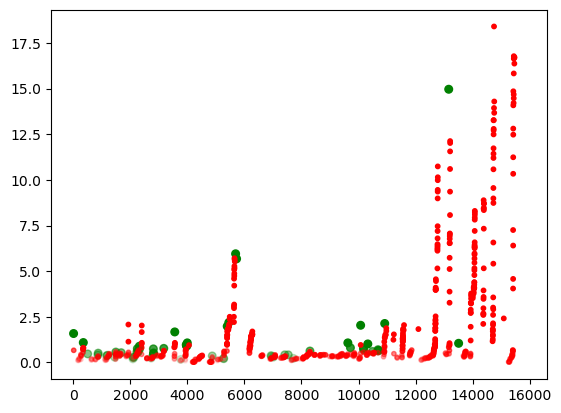

In [78]:
plt.scatter(range(len(r)),TP[:],c="green", s=30, alpha=np.clip(TP[:],0,1))
plt.scatter(range(len(r)),FP[:],c="red", s=10, alpha=np.clip(FP[:],0,1))
plt.show()